In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
vgsales = pd.read_csv("vgsales.csv")
vgsales.info()
vgsales.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


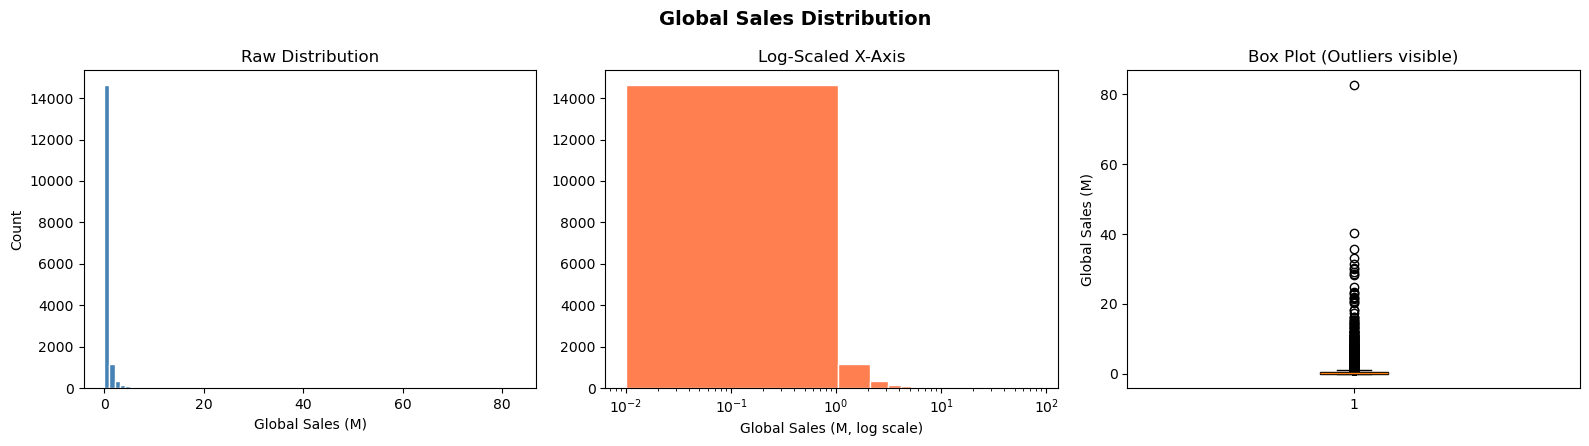

In [11]:
fig, axes = plt.subplots(1, 3, figsize=(16, 4.5))
fig.suptitle("Global Sales Distribution", fontsize=14, fontweight="bold")

# Histogram (raw)
axes[0].hist(vgsales["Global_Sales"].dropna(), bins=80, color="steelblue", edgecolor="white")
axes[0].set_title("Raw Distribution")
axes[0].set_xlabel("Global Sales (M)")
axes[0].set_ylabel("Count")

# Histogram (log-scaled x-axis)
axes[1].hist(vgsales["Global_Sales"].dropna(), bins=80, color="coral", edgecolor="white")
axes[1].set_xscale("log")
axes[1].set_title("Log-Scaled X-Axis")
axes[1].set_xlabel("Global Sales (M, log scale)")

# Box plot
axes[2].boxplot(vgsales["Global_Sales"].dropna(), vert=True, patch_artist=True,
                boxprops=dict(facecolor="mediumseagreen"))
axes[2].set_title("Box Plot (Outliers visible)")
axes[2].set_ylabel("Global Sales (M)")

plt.tight_layout()
plt.savefig("01_sales_distribution.png", dpi=150)
plt.show()


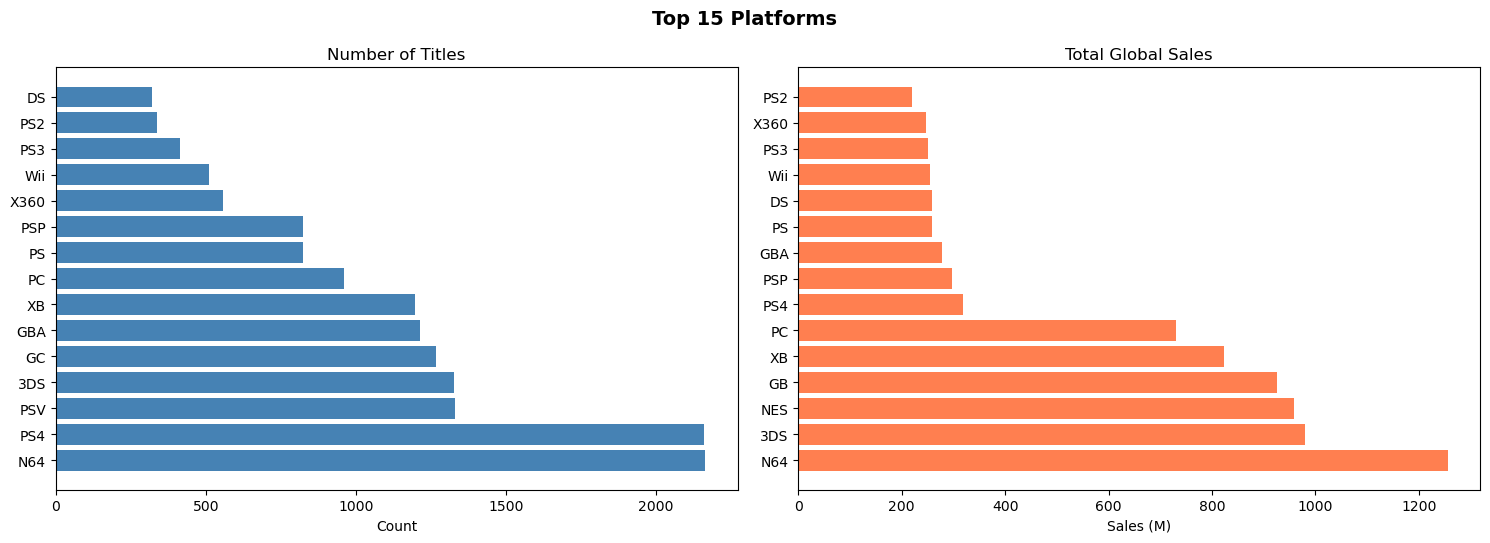

In [13]:
platform_count = vgsales["Platform"].value_counts().head(15)
platform_sales = vgsales.groupby("Platform")["Global_Sales"].sum().nlargest(15)

fig, axes = plt.subplots(1, 2, figsize=(15, 5.5))
fig.suptitle("Top 15 Platforms", fontsize=14, fontweight="bold")

axes[0].barh(platform_count.index[::-1], platform_count.values, color="steelblue")
axes[0].set_title("Number of Titles")
axes[0].set_xlabel("Count")

axes[1].barh(platform_sales.index[::-1], platform_sales.values, color="coral")
axes[1].set_title("Total Global Sales")
axes[1].set_xlabel("Sales (M)")

plt.tight_layout()
plt.savefig("02_platform_analysis.png", dpi=150)
plt.show()

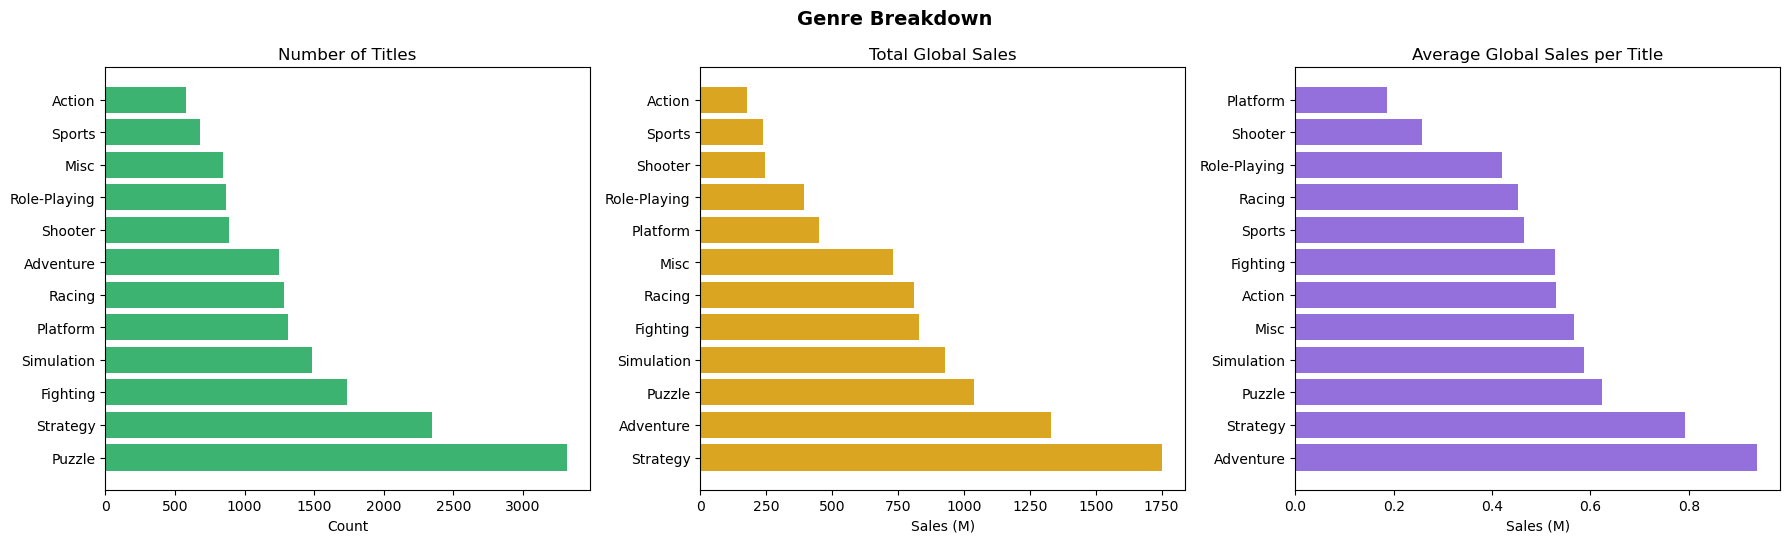

In [15]:
genre_count = vgsales["Genre"].value_counts()
genre_sales = vgsales.groupby("Genre")["Global_Sales"].sum().sort_values(ascending=False)
genre_avg   = vgsales.groupby("Genre")["Global_Sales"].mean().sort_values(ascending=False)

fig, axes = plt.subplots(1, 3, figsize=(18, 5.5))
fig.suptitle("Genre Breakdown", fontsize=14, fontweight="bold")

axes[0].barh(genre_count.index[::-1], genre_count.values, color="mediumseagreen")
axes[0].set_title("Number of Titles")
axes[0].set_xlabel("Count")

axes[1].barh(genre_sales.index[::-1], genre_sales.values, color="goldenrod")
axes[1].set_title("Total Global Sales")
axes[1].set_xlabel("Sales (M)")

axes[2].barh(genre_avg.index[::-1], genre_avg.values, color="mediumpurple")
axes[2].set_title("Average Global Sales per Title")
axes[2].set_xlabel("Sales (M)")

plt.tight_layout()
plt.savefig("03_genre_breakdown.png", dpi=150)
plt.show()

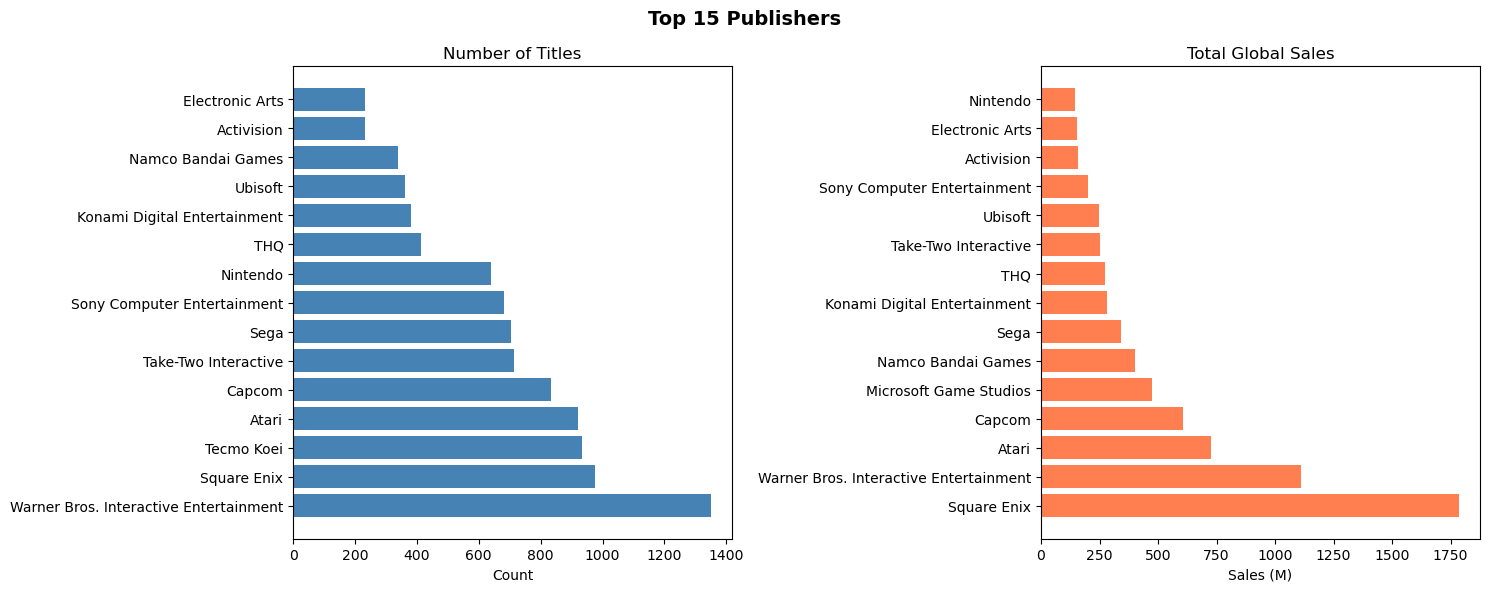

In [17]:
top_pub_count = vgsales["Publisher"].value_counts().head(15)
top_pub_sales = vgsales.groupby("Publisher")["Global_Sales"].sum().nlargest(15)

fig, axes = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle("Top 15 Publishers", fontsize=14, fontweight="bold")

axes[0].barh(top_pub_count.index[::-1], top_pub_count.values, color="steelblue")
axes[0].set_title("Number of Titles")
axes[0].set_xlabel("Count")

axes[1].barh(top_pub_sales.index[::-1], top_pub_sales.values, color="coral")
axes[1].set_title("Total Global Sales")
axes[1].set_xlabel("Sales (M)")

plt.tight_layout()
plt.savefig("04_publisher_landscape.png", dpi=150)
plt.show()


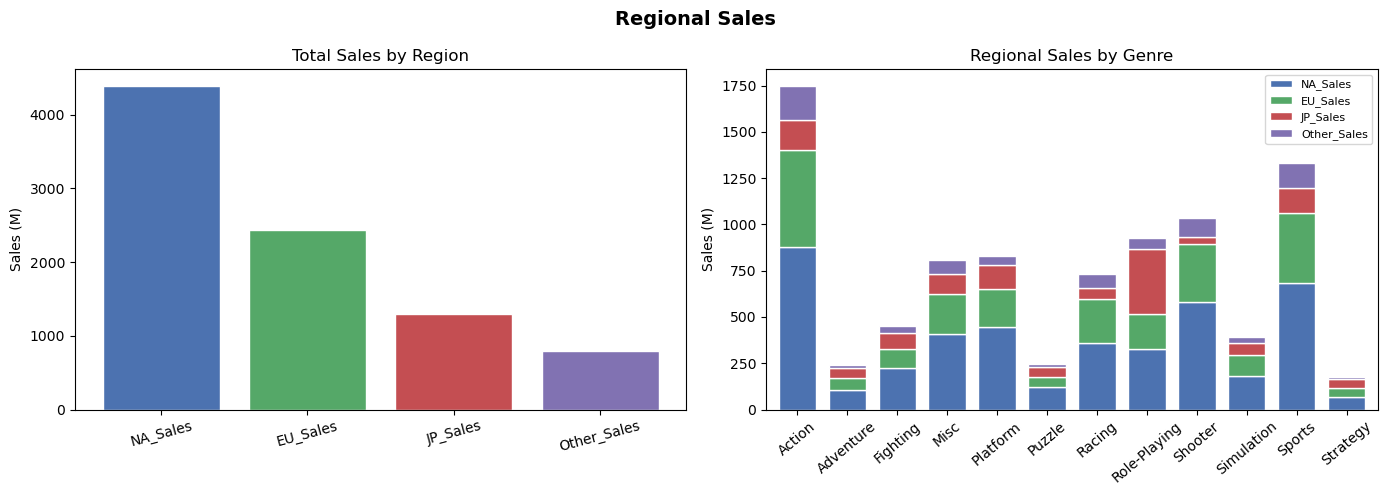

In [19]:
sales_cols = ["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]
regional_totals = vgsales[sales_cols].sum().sort_values(ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle("Regional Sales", fontsize=14, fontweight="bold")

# Total sales per region
colors = ["#4C72B0", "#55A868", "#C44E52", "#8172B2"]
axes[0].bar(regional_totals.index, regional_totals.values, color=colors, edgecolor="white")
axes[0].set_title("Total Sales by Region")
axes[0].set_ylabel("Sales (M)")
axes[0].tick_params(axis="x", rotation=15)

# Regional sales by Genre (stacked)
region_genre = vgsales.groupby("Genre")[sales_cols].sum()
region_genre.plot(kind="bar", stacked=True, ax=axes[1], color=colors, edgecolor="white", width=0.75)
axes[1].set_title("Regional Sales by Genre")
axes[1].set_ylabel("Sales (M)")
axes[1].set_xlabel("")
axes[1].tick_params(axis="x", rotation=40)
axes[1].legend(loc="upper right", fontsize=8)

plt.tight_layout()
plt.savefig("05_regional_sales.png", dpi=150)
plt.show()

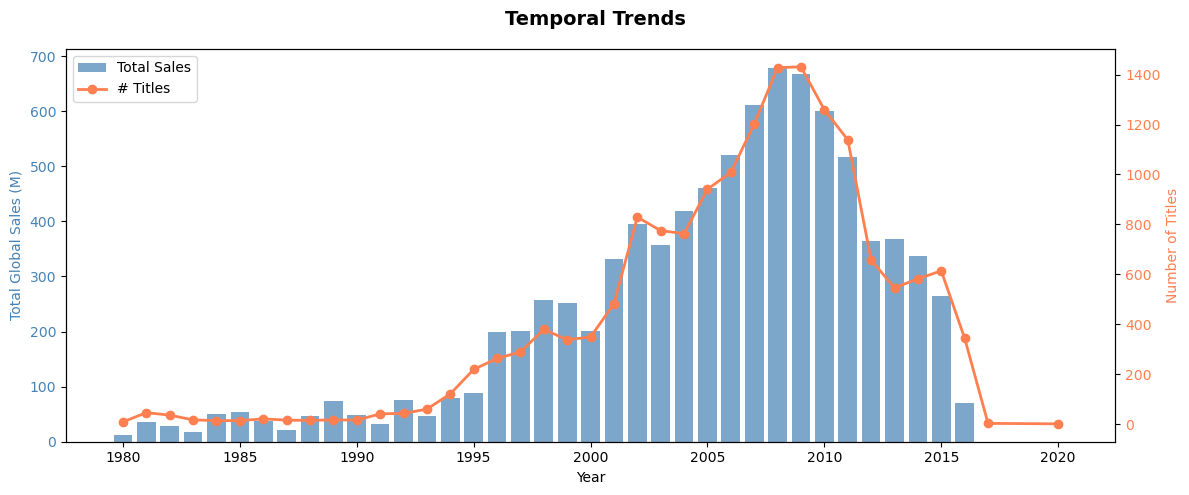

In [21]:
ts = vgsales.dropna(subset=["Year"]).copy()
ts["Year"] = ts["Year"].astype(int)

yearly_sales = ts.groupby("Year")["Global_Sales"].sum()
yearly_count = ts.groupby("Year")["Name"].count()

fig, ax1 = plt.subplots(figsize=(12, 5))
fig.suptitle("Temporal Trends", fontsize=14, fontweight="bold")

color1, color2 = "steelblue", "coral"
ax1.bar(yearly_sales.index, yearly_sales.values, color=color1, alpha=0.7, label="Total Sales")
ax1.set_xlabel("Year")
ax1.set_ylabel("Total Global Sales (M)", color=color1)
ax1.tick_params(axis="y", labelcolor=color1)

ax2 = ax1.twinx()
ax2.plot(yearly_count.index, yearly_count.values, color=color2, marker="o", linewidth=2, label="# Titles")
ax2.set_ylabel("Number of Titles", color=color2)
ax2.tick_params(axis="y", labelcolor=color2)

# Combined legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc="upper left")

plt.tight_layout()
plt.savefig("06_temporal_trends.png", dpi=150)
plt.show()


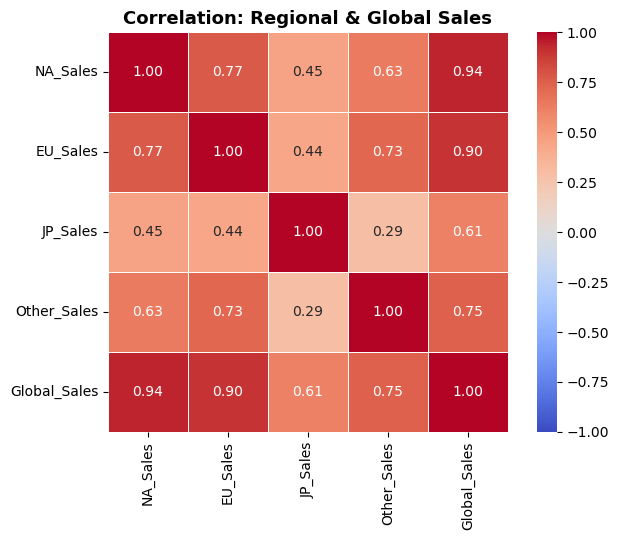

In [23]:
numeric_cols = ["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Global_Sales"]
corr = vgsales[numeric_cols].corr()

fig, ax = plt.subplots(figsize=(7, 5.5))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1,
            square=True, linewidths=0.5, ax=ax)
ax.set_title("Correlation: Regional & Global Sales", fontsize=13, fontweight="bold")
plt.tight_layout()
plt.savefig("07_correlation_heatmap.png", dpi=150)
plt.show()

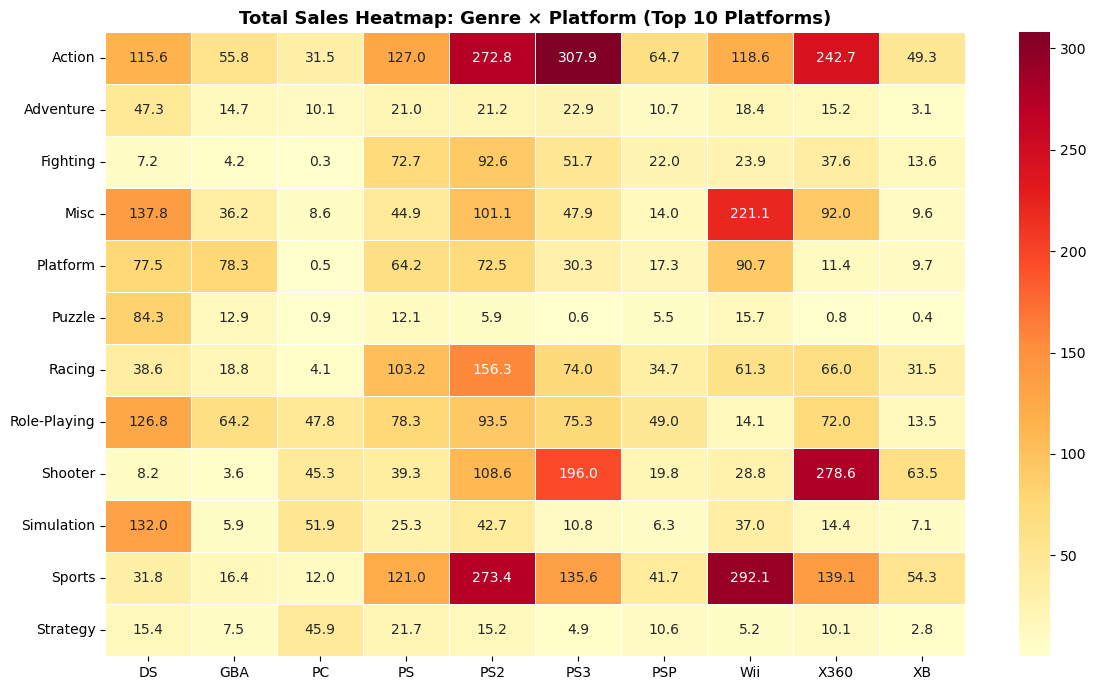

In [25]:
top10_platforms = vgsales["Platform"].value_counts().head(10).index
subset = vgsales[vgsales["Platform"].isin(top10_platforms)]
pivot = subset.pivot_table(values="Global_Sales", index="Genre",
                           columns="Platform", aggfunc="sum", fill_value=0)

fig, ax = plt.subplots(figsize=(12, 7))
sns.heatmap(pivot, cmap="YlOrRd", annot=True, fmt=".1f", linewidths=0.5, ax=ax)
ax.set_title("Total Sales Heatmap: Genre × Platform (Top 10 Platforms)", fontsize=13, fontweight="bold")
ax.set_xlabel("")
ax.set_ylabel("")
plt.tight_layout()
plt.savefig("08_genre_platform_heatmap.png", dpi=150)
plt.show()

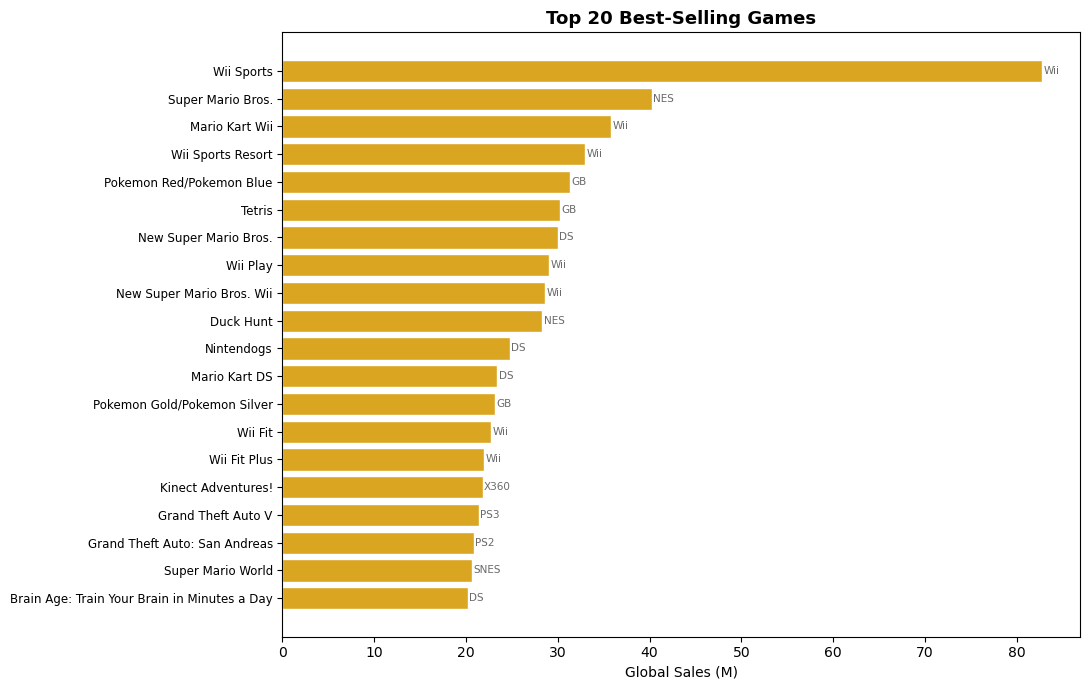

In [27]:
top20 = vgsales.nlargest(20, "Global_Sales")[["Name", "Platform", "Genre", "Global_Sales"]]

fig, ax = plt.subplots(figsize=(11, 7))
bars = ax.barh(range(len(top20)), top20["Global_Sales"].values, color="goldenrod", edgecolor="white")
ax.set_yticks(range(len(top20)))
ax.set_yticklabels(top20["Name"].values, fontsize=8.5)
ax.invert_yaxis()
ax.set_xlabel("Global Sales (M)")
ax.set_title("Top 20 Best-Selling Games", fontsize=13, fontweight="bold")

# Annotate with platform
for i, (sales, platform) in enumerate(zip(top20["Global_Sales"], top20["Platform"])):
    ax.text(sales + 0.15, i, platform, va="center", fontsize=7.5, color="dimgray")

plt.tight_layout()
plt.savefig("09_top20_games.png", dpi=150)
plt.show()
